# Interquartile Range Rule:
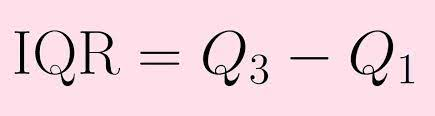
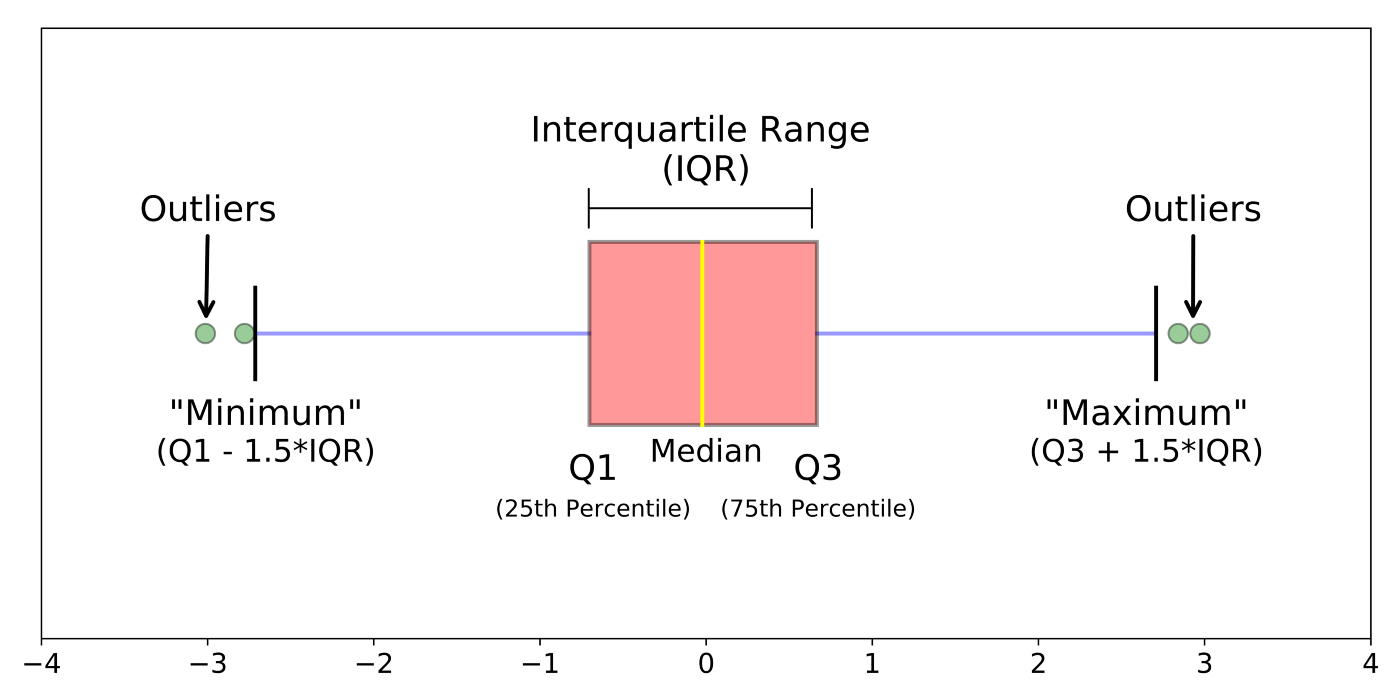
The interquartile range rule is useful in detecting the presence of outliers. Outliers are individual values that fall outside of the overall pattern of a data set. This definition is somewhat vague and subjective, so it is helpful to have a rule to apply when determining whether a data point is truly an outlier—this is where the interquartile range rule comes in.<br>
<br>
What Is the Interquartile Range?<br>
<br>Any set of data can be described by its five-number summary. These five numbers, which give you the information you need to find patterns and outliers, consist of (in ascending order):<br>
<br>
- The minimum or lowest value of the dataset<br>
- The first quartile Q1, which represents a quarter of the way through the list of all data<br>
- The median of the data set, which represents the midpoint of the whole list of data
The third quartile Q3, which represents three-quarters of the way through the list of all data<br>
- The maximum or highest value of the data set.<br>
These five numbers tell a person more about their data than looking at the numbers all at once could, or at least make this much easier. For example, the range, which is the minimum subtracted from the maximum, is one indicator of how spread out the data is in a set (note: the range is highly sensitive to outliers—if an outlier is also a minimum or maximum, the range will not be an accurate representation of the breadth of a data set).<br>

Range would be difficult to extrapolate otherwise. Similar to the range but less sensitive to outliers is the interquartile range. The interquartile range is calculated in much the same way as the range. All you do to find it is subtract the first quartile from the third quartile:<br>
<br>
**IQR = Q3 – Q1.<br>
lower_limit = Q1 - 1.5 * IQR<br>
upper_limit = Q3 + 1.5 * IQR** <br>
The interquartile range shows how the data is spread about the median. It is less susceptible than the range to outliers and can, therefore, be more helpful.<br>

### Using the Interquartile Rule to Find Outliers
Though it's not often affected much by them, the interquartile range can be used to detect outliers. This is done using these steps:
<br>
- Calculate the interquartile range for the data.<br>
- Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).<br>
- Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.<br>
- Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.<br>
Remember that the interquartile rule is only a rule of thumb that generally holds but does not apply to every case. In general, you should always follow up your outlier analysis by studying the resulting outliers to see if they make sense. Any potential outlier obtained by the interquartile method should be examined in the context of the entire set of data.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc("figure",figsize = (12,6))
plt.style.use("ggplot")

In [24]:
df = pd.read_csv('height.csv')

In [25]:
df.shape

(14, 2)

In [26]:
df.describe()

,height
count,14.000000
mean,6.014286
std,2.790604
min,1.200000
25%,5.125000
50%,5.550000
75%,6.175000
max,14.500000


In [27]:
q1 = df.height.quantile(.25)
q3 = df.height.quantile(.75)

In [28]:
q1,q3

(5.125, 6.175)

In [29]:
iqr = q3 - q1

In [30]:
iqr

1.0499999999999998

In [31]:
lower_limit = q1 - 1.5*iqr

In [32]:
upper_limit = q3 + 1.5*iqr

In [33]:
lower_limit

3.5500000000000003

In [34]:
upper_limit

7.75

In [35]:
#every value beyond upper and lower limit are outliers:
df[df.height>upper_limit]

,name,height
9,imran,14.5


In [36]:
df[df.height<lower_limit]

,name,height
12,yoseph,1.2


In [37]:
df_no_outlier = df[(df.height<upper_limit)&(df.height>lower_limit)]

In [38]:
df_no_outlier

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


<AxesSubplot:xlabel='height', ylabel='Count'>

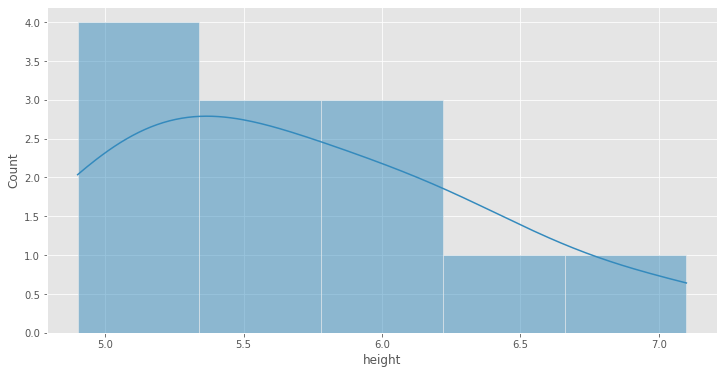

In [39]:
sns.histplot(x='height',data=df_no_outlier,kde=True)